# Custemer Segmentation - Musteri Siniflandirmasi - Clustering

<img src="https://www.aimtechnologies.co/wp-content/uploads/2023/08/Customer-Segmentation-Analysis-1200x675.jpg" width="800" height="400">

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 190)


In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

<ipython-input-2-f6002df4d304>:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")


### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.shape

(4194, 181)

In [5]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

Columns with more than 3,000 missing values were removed from the data frame

In [6]:
null_counts = df.isnull().sum()
columns_to_drop = null_counts[null_counts > 3000].index
df = df.drop(columns=columns_to_drop)

In [7]:
df.shape

(4194, 94)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.mailing              2114 non-null   float64
 5   Customers.last_modified        4194 non-null   int64  
 6   Customers.customer_type        3771 non-null   float64
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.fname                   4194 non-null   object 
 10  Orders.lname                   4194 non-null   object 
 11  Orders.order_number            4194 non-null   object 
 12  Orders.currency                4194 non-null   o

In [9]:
df.isnull().sum()

Customers.id                        0
Customers.fname                     0
Customers.lname                     0
Customers.create_date               0
Customers.mailing                2080
Customers.last_modified             0
Customers.customer_type           423
Orders.id                           0
Orders.customer_id                  0
Orders.fname                        0
Orders.lname                        0
Orders.order_number                 0
Orders.currency                     0
Orders.subtotal                     0
Orders.tax                        457
Orders.shipping                   195
Orders.total                        0
Orders.shipping_carrier           617
Orders.shipping_method            443
Orders.tracking                   376
Orders.payment_status               5
Orders.payment_date                18
Orders.payment_user              2814
Orders.payment_type               384
Orders.payment_amount              18
Orders.payment_id                 430
Orders.payme

In [10]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.notes,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_color,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.latex,Products.upc,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,NaN,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,Insured By Eye4Fraud,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,Green,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,3,John,Smith,1386089139,NaN,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,62.0,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,Yes,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,3,John,Smith,1386089139,NaN,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,NaN,3.

In [11]:
customers=df[['Customers.create_date','Customers.last_modified','Customers.customer_type','Customers.id']]

In [12]:
orders=df[['Orders.subtotal','Orders.total','Orders.payment_status','Orders.payment_amount','Orders.status','Orders.payment_date']]

In [13]:
products=df[['Products.list_price','Products.price','Products.cost','Products.status']]

In [14]:
customers['Customers.customer_type'].value_counts()

Customers.customer_type
0.0    3319
1.0     386
2.0      66
Name: count, dtype: int64

In [15]:
customers['Customers.customer_type']=customers['Customers.customer_type'].fillna(0.0)

<ipython-input-15-26813b947728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Customers.customer_type']=customers['Customers.customer_type'].fillna(0.0)


In [16]:
orders['Orders.payment_amount'].value_counts()

Orders.payment_amount
129.99    39
16.23     27
132.99    23
22.66     20
14.85     19
          ..
54.60      1
107.46     1
95.42      1
184.10     1
24.54      1
Name: count, Length: 2253, dtype: int64

In [17]:
orders['Orders.payment_amount']=orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mean())

<ipython-input-17-85ddca7f3ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Orders.payment_amount']=orders['Orders.payment_amount'].fillna(orders['Orders.payment_amount'].mean())


In [18]:
orders.isnull().sum()

Orders.subtotal           0
Orders.total              0
Orders.payment_status     5
Orders.payment_amount     0
Orders.status             0
Orders.payment_date      18
dtype: int64

In [19]:
orders['Orders.payment_status'].value_counts()

Orders.payment_status
3.0    4115
1.0      50
0.0      24
Name: count, dtype: int64

In [20]:
orders['Orders.payment_status']=orders['Orders.payment_status'].fillna(orders['Orders.payment_status'].mode()[0])

<ipython-input-20-0e2833348117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Orders.payment_status']=orders['Orders.payment_status'].fillna(orders['Orders.payment_status'].mode()[0])


In [21]:
products.isnull().sum()

Products.list_price    177
Products.price         158
Products.cost          157
Products.status        157
dtype: int64

In [22]:
products['Products.list_price'].value_counts()

Products.list_price
279.99     134
33.11       88
82.42       72
134.39      53
265.99      52
          ... 
33.07        1
356.87       1
32.76        1
22.99        1
2107.50      1
Name: count, Length: 1260, dtype: int64

In [23]:
orders['Orders.payment_date']=orders['Orders.payment_date'].fillna(orders['Orders.payment_date'].mean())

<ipython-input-23-5a505dc7220d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Orders.payment_date']=orders['Orders.payment_date'].fillna(orders['Orders.payment_date'].mean())


In [24]:
products['Products.list_price']=products['Products.list_price'].fillna(products['Products.list_price'].mean())

<ipython-input-24-df997f7c7b59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Products.list_price']=products['Products.list_price'].fillna(products['Products.list_price'].mean())


In [25]:
products['Products.price']=products['Products.price'].fillna(products['Products.price'].mean())

<ipython-input-25-d2f433fb53db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Products.price']=products['Products.price'].fillna(products['Products.price'].mean())


In [26]:
products['Products.status']=products['Products.status'].fillna(products['Products.status'].mode()[0])

<ipython-input-26-b9f5e78b1bce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Products.status']=products['Products.status'].fillna(products['Products.status'].mode()[0])


In [27]:
products.isnull().sum()

Products.list_price      0
Products.price           0
Products.cost          157
Products.status          0
dtype: int64

In [28]:
products['Products.cost']=products['Products.cost'].fillna(products['Products.cost'].mean())

<ipython-input-28-3584b50274ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Products.cost']=products['Products.cost'].fillna(products['Products.cost'].mean())


In [29]:
products.isnull().sum()

Products.list_price    0
Products.price         0
Products.cost          0
Products.status        0
dtype: int64

In [30]:
import sqlite3

In [31]:
df1=pd.DataFrame(customers)
conn=sqlite3.connect('customers.db')
df1.to_sql('customers',conn,index=False,if_exists='replace')
conn.close()

In [32]:
df1=pd.DataFrame(products)
conn=sqlite3.connect('products.db')
df1.to_sql('products',conn,index=False,if_exists='replace')
conn.close()

In [33]:
df1=pd.DataFrame(orders)
conn=sqlite3.connect('orders.db')
df1.to_sql('orders',conn,index=False,if_exists='replace')
conn.close()

In [34]:
conn=sqlite3.connect('products.db')
query='SELECT * FROM products'
products=pd.read_sql_query(query,conn)
conn.close()

In [35]:
products

,Products.list_price,Products.price,Products.cost,Products.status
0,80.70,57.64,44.00,0.0
1,14.41,10.29,1.87,1.0
2,96.29,68.78,52.50,0.0
3,27.38,19.56,12.62,0.0
4,50.47,36.05,25.75,1.0
...,...,...,...,...
4189,33.11,23.65,15.50,3.0
4190,55.19,69.99,28.16,3.0
4191,2107.50,1099.00,675.00,3.0
4192,175.81,129.99,91.00,3.0


In [36]:
conn=sqlite3.connect('orders.db')
query='SELECT * FROM orders'
orders=pd.read_sql_query(query,conn)
conn.close()

In [37]:
conn=sqlite3.connect('customers.db')
query='SELECT * FROM customers'
customers=pd.read_sql_query(query,conn)
conn.close()

In [38]:
df2=pd.concat([customers,products,orders],axis=1)

In [39]:
df2

,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date
0,1426018724,1437764306,0.0,797,80.70,57.64,44.00,0.0,57.20,64.29,3.0,64.29,1,1.426019e+09
1,1386089139,1437764354,0.0,3,14.41,10.29,1.87,1.0,20.00,29.99,3.0,29.99,1,1.386090e+09
2,1386089139,1437764354,0.0,3,96.29,68.78,52.50,0.0,68.78,78.73,3.0,78.73,3,1.449604e+09
3,1386780263,1437762646,0.0,4,27.38,19.56,12.62,0.0,19.56,29.55,3.0,29.55,1,1.386780e+09
4,1386861599,1437764316,0.0,5,50.47,36.05,25.75,1.0,36.05,46.00,3.0,46.00,1,1.386862e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1463408698,0.0,3730,33.11,23.65,15.50,3.0,14.85,16.06,3.0,16.06,0,1.463409e+09
4190,1463412756,1463412756,0.0,3732,55.19,69.99,28.16,3.0,39.99,39.99,1.0,39.99,0,1.463413e+09
4191,1463413245,1463413245,0.0,3733,2107.50,1099.00,675.00,3.0,1099.00,989.10,1.0,989.10,5,1.463413e+09
4192,1463416687,1463416687,0.0,3735,175.81,129.99,91.00,3.0,129.99,129.99,3.0,129.99,0,1.463417e+09


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customers.create_date    4194 non-null   int64  
 1   Customers.last_modified  4194 non-null   int64  
 2   Customers.customer_type  4194 non-null   float64
 3   Customers.id             4194 non-null   int64  
 4   Products.list_price      4194 non-null   float64
 5   Products.price           4194 non-null   float64
 6   Products.cost            4194 non-null   float64
 7   Products.status          4194 non-null   float64
 8   Orders.subtotal          4194 non-null   float64
 9   Orders.total             4194 non-null   float64
 10  Orders.payment_status    4194 non-null   float64
 11  Orders.payment_amount    4194 non-null   float64
 12  Orders.status            4194 non-null   int64  
 13  Orders.payment_date      4194 non-null   float64
dtypes: float64(10), int64(4)

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

## Modeling

In [42]:
model=KMeans(4)

In [43]:
model=model.fit(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
tahmin=model.predict(df2)

In [45]:
df2['cluster']=tahmin

In [46]:
df2

,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,cluster
0,1426018724,1437764306,0.0,797,80.70,57.64,44.00,0.0,57.20,64.29,3.0,64.29,1,1.426019e+09,1
1,1386089139,1437764354,0.0,3,14.41,10.29,1.87,1.0,20.00,29.99,3.0,29.99,1,1.386090e+09,3
2,1386089139,1437764354,0.0,3,96.29,68.78,52.50,0.0,68.78,78.73,3.0,78.73,3,1.449604e+09,1
3,1386780263,1437762646,0.0,4,27.38,19.56,12.62,0.0,19.56,29.55,3.0,29.55,1,1.386780e+09,3
4,1386861599,1437764316,0.0,5,50.47,36.05,25.75,1.0,36.05,46.00,3.0,46.00,1,1.386862e+09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1463408698,0.0,3730,33.11,23.65,15.50,3.0,14.85,16.06,3.0,16.06,0,1.463409e+09,2
4190,1463412756,1463412756,0.0,3732,55.19,69.99,28.16,3.0,39.99,39.99,1.0,39.99,0,1.463413e+09,2
4191,1463413245,1463413245,0.0,3733,2107.50,1099.00,675.00,3.0,1099.00,989.10,1.0,989.10,5,1.463413e+09,2
4192,1463416687,1463416687,0.0,3735,175.81,129.99,91.00,3.0,129.99,129.99,3.0,129.99,0,1.463417e+09,2


In [47]:
silhouette_score(df2,tahmin)

0.5342476153663512

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

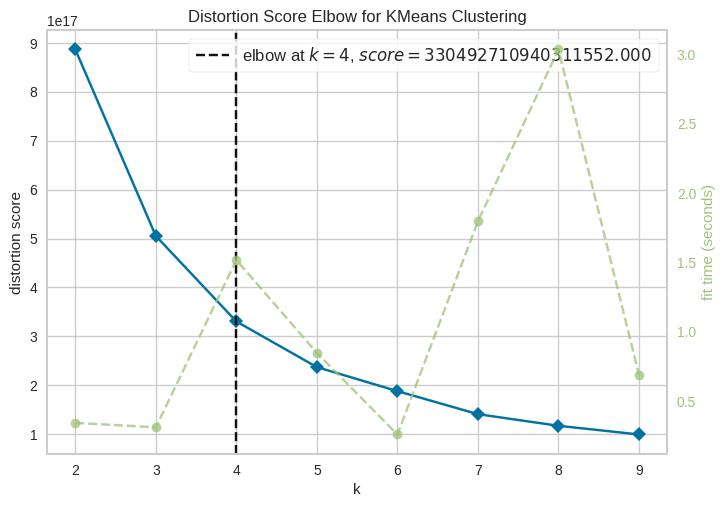

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(df2)
vis.show()

In [49]:
from scipy.cluster.hierarchy import dendrogram,linkage
data=linkage(df2,method='ward',metric='euclidean')
import matplotlib.pyplot as plt

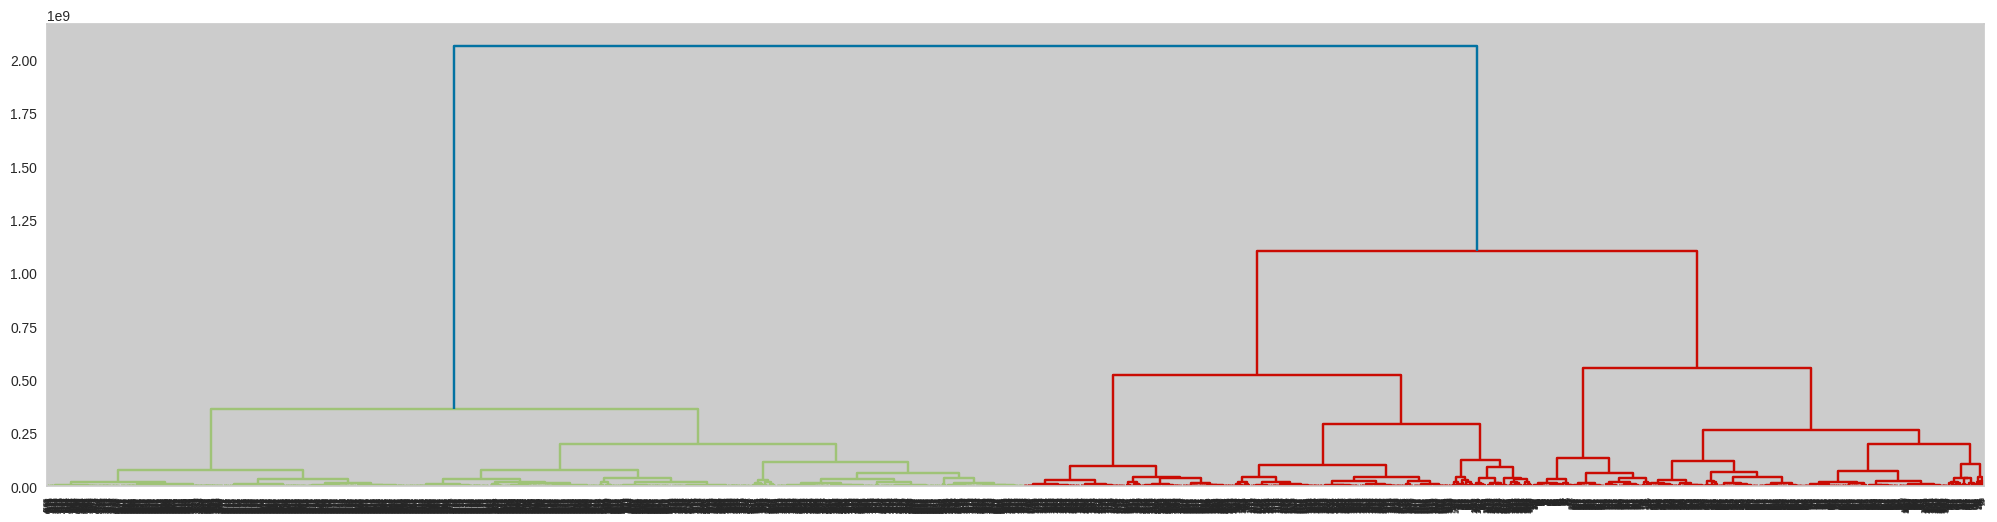

In [50]:
plt.figure(figsize=(25,6))
dendrogram(data);

## Result Visualization

In [51]:
cluster_counts = df2['cluster'].value_counts().sort_index()

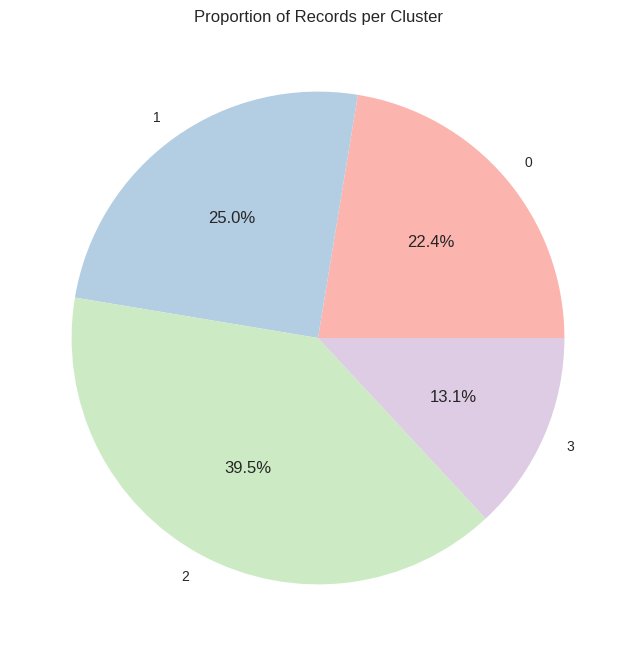

In [52]:

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors)
plt.title('Proportion of Records per Cluster')
plt.show()


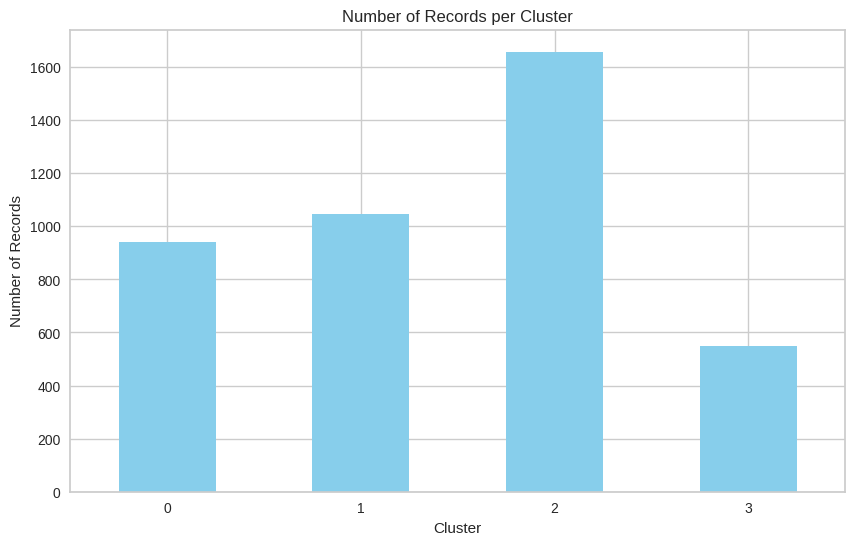

In [53]:
import seaborn as sns
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Records per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x800 with 0 Axes>

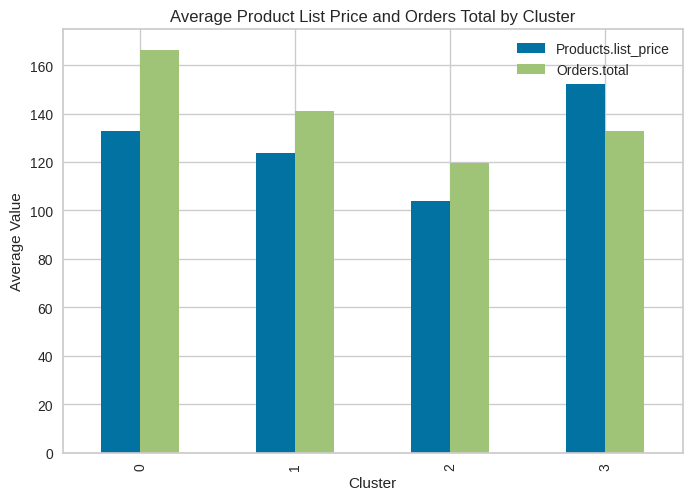

In [54]:
cluster_means = df2.groupby('cluster').mean()
plt.figure(figsize=(12, 8))
cluster_means[['Products.list_price', 'Orders.total']].plot(kind='bar')
plt.title('Average Product List Price and Orders Total by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()

<Figure size 1200x800 with 0 Axes>

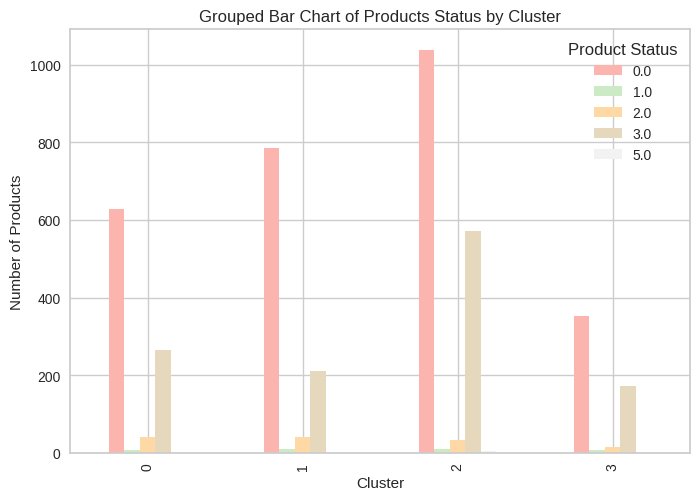

In [55]:
status_by_cluster = df2.groupby(['cluster', 'Products.status']).size().unstack()
plt.figure(figsize=(12, 8))
status_by_cluster.plot(kind='bar', colormap='Pastel1')
plt.title('Grouped Bar Chart of Products Status by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.legend(title='Product Status')
plt.show()

### RFM TABLE

In [56]:
df2['customerID']=df['Customers.id']

In [57]:
df2['Orders.payment_date'] = pd.to_datetime(df2['Orders.payment_date'], unit='s')

In [58]:
df2

,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.id,Products.list_price,Products.price,Products.cost,Products.status,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,cluster,customerID
0,1426018724,1437764306,0.0,797,80.70,57.64,44.00,0.0,57.20,64.29,3.0,64.29,1,2015-03-10 20:24:59,1,797
1,1386089139,1437764354,0.0,3,14.41,10.29,1.87,1.0,20.00,29.99,3.0,29.99,1,2013-12-03 17:07:35,3,3
2,1386089139,1437764354,0.0,3,96.29,68.78,52.50,0.0,68.78,78.73,3.0,78.73,3,2015-12-08 19:40:52,1,3
3,1386780263,1437762646,0.0,4,27.38,19.56,12.62,0.0,19.56,29.55,3.0,29.55,1,2013-12-11 16:44:23,3,4
4,1386861599,1437764316,0.0,5,50.47,36.05,25.75,1.0,36.05,46.00,3.0,46.00,1,2013-12-12 15:19:59,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1463408698,0.0,3730,33.11,23.65,15.50,3.0,14.85,16.06,3.0,16.06,0,2016-05-16 14:27:34,2,3730
4190,1463412756,1463412756,0.0,3732,55.19,69.99,28.16,3.0,39.99,39.99,1.0,39.99,0,2016-05-16 15:32:37,2,3732
4191,1463413245,1463413245,0.0,3733,2107.50,1099.00,675.00,3.0,1099.00,989.10,1.0,989.10,5,2016-05-16 15:40:46,2,3733
4192,1463416687,1463416687,0.0,3735,175.81,129.99,91.00,3.0,129.99,129.99,3.0,129.99,0,2016-05-16 16:38:14,2,3735


In [59]:
now = pd.to_datetime('2024-03-14')
recency = now - df2.groupby('customerID')['Orders.payment_date'].max()
recency = recency.dt.days
frequency = df2.groupby('customerID')['Orders.payment_date'].count()
monetary = df2.groupby('customerID')['Orders.total'].sum()

In [60]:
rfm_df = pd.DataFrame({
'Recency': recency,
'Frequency': frequency,
'Monetary': monetary
})
rfm_df

,Recency,Frequency,Monetary
customerID,,,
3,3018,2,108.72
4,3745,1,29.55
5,3093,3,124.99
7,3729,1,49.14
8,3712,1,69.70
...,...,...,...
3730,2858,1,16.06
3732,2858,1,39.99
3733,2858,1,989.10
